In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt

In [5]:
df_simulated=pd.read_parquet('../../Data/simulated/pi-_10GeV_4ly_3e-4_inclined/TrkData_viewx_cl_TB_2023_T10_Sept_pi-Mono_10000_inclined_10000-evt-0_pitch0.25.parquet')
df_simulatedy=pd.read_parquet('../../Data/simulated/pi-_10GeV_4ly_3e-4_inclined/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_inclined_10000-evt-0_pitch0.25.parquet')

In [6]:
# df_simulated = df_simulated.groupby('Ev').filter(lambda x: x['ly'].nunique() > 1)

In [7]:
df_simulated

,Ev,ly,view,x_hit,zx_hit,dx_hit,PE,PID,xMC
0,0,0,0,[-7.84],-30.539,[1.05],[23],[-211.0],-7.831785
1,0,1,0,"[-14.921, 7.384]",1164.392,"[1.81, 1.55]","[25, 10]","[-211.0, -999.0]",-14.904903
2,0,2,0,[-15.133],1201.963,[2.32],[18],[-211.0],-15.127296
3,0,3,0,[5.177],1787.750,[0.92],[14],[-999.0],-18.594727
5,2,0,0,"[-10.125, -8.341]",-30.466,"[1.18, 1.64]","[30, 11]","[-211.0, -999.0]",-10.031444
...,...,...,...,...,...,...,...,...,...
37357,9998,3,0,"[-7.341, 10.552, 11.766]",1787.627,"[1.47, 1.39, 2.21]","[11, 14, 7]","[-999.0, -211.0, -999.0]",10.600184
37358,9999,0,0,"[2.303, 4.034, 9.659]",-30.450,"[0.33, 0.72, 1.66]","[26, 22, 15]","[-211.0, -999.0, -999.0]",2.503541
37359,9999,1,0,"[-8.072, 10.615]",1164.392,"[1.49, 1.22]","[13, 28]","[-999.0, -211.0]",10.606305
37360,9999,2,0,"[-14.734, 10.804]",1202.142,"[2.75, 1.53]","[7, 12]","[-999.0, -211.0]",10.862305


In [3]:
df_simulatedy=pd.read_parquet('../../Data/simulated/pi-_10GeV_4ly_1e-4_inclined/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_inclined_10000-evt-0_pitch0.25.parquet')# 
# df_simulatedy=pd.read_parquet('../../Data/simulated/pi-_10GeV_4ly/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-0_pitch0.25.parquet')

In [8]:
df_simulated.Ev.nunique()

9503

In [10]:
df_filtered = df_simulated.groupby('Ev').filter(lambda x: x['ly'].nunique() > 3)
df_filteredy = df_simulatedy.groupby('Ev').filter(lambda x: x['ly'].nunique() > 3)

In [11]:
common_events = set(df_filtered['Ev']).intersection(set(df_filteredy['Ev']))

In [12]:
len(common_events)

7486

In [13]:
df_filtered = df_filtered[df_filtered['Ev'].isin(common_events)]
df_filteredy = df_filteredy[df_filteredy['Ev'].isin(common_events)]

In [5]:
# node_df_pi=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_1e-4/TrkData_viewx_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-150_pitch0.25node_df.parquet')
# node_df_y_pi=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_1e-4/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-150_pitch0.25node_df.parquet')

In [14]:
node_df_pi=df_filtered.apply(lambda x: x.explode() if x.name in ['x_hit','dx_hit','PE','PID'] else x)
node_df_y_pi=df_filteredy.apply(lambda x: x.explode() if x.name in ['y_hit','dy_hit','PE','PID'] else x)

In [8]:
edge_df_pi=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_1e-4_inclined/TrkData_viewx_cl_TB_2023_T10_Sept_pi-Mono_10000_inclined_10000-evt-0_pitch0.25edge_df.parquet')

In [9]:
edge_df_pi.head(10)

,idx_node_s,x_hit_s,zx_hit_s,dx_hit_s,xMC_s,ly_s,PE_s,PID_s,idx_node_t,x_hit_t,...,dx_hit_t,xMC_t,ly_t,PE_t,PID_t,Ev,angx_row,angx_MC,deangx,edge_class
0,0,-7.840,-30.394,1.05,-7.832643,0,23,-211.0,2,-14.921,...,1.81,-14.905323,1,25,-211.0,0,270.339544,270.339145,-0.100337,1
1,1,5.638,-30.394,1.07,-7.832643,0,12,-999.0,2,-14.921,...,1.81,-14.905323,1,25,-211.0,0,270.985748,270.339145,-0.100795,0
2,2,-14.921,1164.463,1.81,-14.905323,1,25,-211.0,3,-15.133,...,2.32,-15.128148,2,18,-211.0,0,270.322670,270.339145,-4.478519,1
3,2,-14.921,1164.463,1.81,-14.905323,1,25,-211.0,4,-1.841,...,0.36,-15.128148,2,11,-999.0,0,250.839413,270.339145,-2.506272,0
4,0,-10.125,-30.683,1.18,-10.031346,0,30,-211.0,1,-10.548,...,1.39,-10.570450,1,23,-211.0,2,270.020276,270.025841,-0.087398,1
5,0,-10.125,-30.683,1.18,-10.031346,0,30,-211.0,2,-0.841,...,0.17,-10.570450,1,12,-999.0,2,269.554997,270.025841,-0.057142,0
6,0,-10.125,-30.683,1.18,-10.031346,0,30,-211.0,3,11.253,...,1.94,-10.570450,1,8,-999.0,2,268.975393,270.025841,-0.108806,0
7,1,-10.548,1164.642,1.39,-10.570450,1,23,-211.0,4,-10.457,...,1.35,-10.587217,2,15,-211.0,2,269.859758,270.025841,-2.986179,1
8,1,-10.548,1164.642,1.39,-10.570450,1,23,-211.0,5,-6.068,...,1.22,-10.587217,2,11,-999.0,2,263.128910,270.025841,-2.809445,0
9,2,-0.841,1164.642,0.17,-10.570450,1,12,-999.0,4,-10.457,...,1.35,-10.587217,2,15,-211.0,2,284.501611,270.025841,-1.965457,0


In [7]:
edge_df_pi.head(10)

,idx_node_s,x_hit_s,zx_hit_s,dx_hit_s,xMC_s,ly_s,PE_s,PID_s,idx_node_t,x_hit_t,...,dx_hit_t,xMC_t,ly_t,PE_t,PID_t,Ev,angx_row,angx_MC,deangx,edge_class
0,0,-3.540,-30.596,0.45,-3.63,0,25,-211.0,2,-3.507,...,0.42,-3.63,1,15,-211.0,0,269.998418,270.0,-0.029508,1
1,0,-3.540,-30.596,0.45,-3.63,0,25,-211.0,3,11.285,...,2.00,-3.63,1,8,-999.0,0,269.289354,270.0,-0.098258,0
2,0,-3.540,-30.596,0.45,-3.63,0,25,-211.0,4,12.785,...,2.61,-3.63,1,6,-999.0,0,269.217459,270.0,-0.126941,0
3,1,3.017,-30.596,0.57,-3.63,0,7,-999.0,2,-3.507,...,0.42,-3.63,1,15,-211.0,0,270.312745,270.0,-0.033940,0
4,1,3.017,-30.596,0.57,-3.63,0,7,-999.0,3,11.285,...,2.00,-3.63,1,8,-999.0,0,269.603654,270.0,-0.099689,1
5,1,3.017,-30.596,0.57,-3.63,0,7,-999.0,4,12.785,...,2.61,-3.63,1,6,-999.0,0,269.531751,270.0,-0.128059,1
6,2,-3.507,1164.607,0.42,-3.63,1,15,-211.0,5,-3.507,...,0.38,-3.63,2,18,-211.0,0,270.000000,270.0,-0.872058,1
7,3,11.285,1164.607,2.00,-3.63,1,8,-999.0,5,-3.507,...,0.38,-3.63,2,18,-211.0,0,291.677598,270.0,-2.706757,0
8,4,12.785,1164.607,2.61,-3.63,1,6,-999.0,5,-3.507,...,0.38,-3.63,2,18,-211.0,0,293.643995,270.0,-3.407740,0
9,5,-3.507,1201.820,0.38,-3.63,2,18,-211.0,6,-11.979,...,1.98,-3.63,3,9,-999.0,0,270.828792,270.0,-0.197205,0


In [7]:
exp_df=pd.read_csv('/lustrehome/federicacuna/TestBeam_T10_2023/code/Analysis_v1.3_20230910_055858_Aligned_x_view_nodedf.csv')
exp_df_y=pd.read_csv('/lustrehome/federicacuna/TestBeam_T10_2023/code/Analysis_v1.3_20230910_055858_Aligned_y_view_nodedf.csv')

In [8]:
exp_df=exp_df.sort_values(by=['Ev', 'ly'], ascending=[True, True])

In [9]:
exp_df_y=exp_df_y.sort_values(by=['Ev', 'ly'], ascending=[True, True])

In [46]:
exp_df.head(5)

,Ev,x_hit,dx_hit,ly,zx_hit,view,PE
0,0,-0.212289,0.214816,0,-30,0,63.88780
5,0,1.584380,0.219120,1,1165,0,47.37180
6,0,1.603310,0.231354,1,1165,1,36.37950
2,0,4.483590,0.288675,2,1206,0,8.17131
3,0,1.441190,0.176515,2,1206,0,38.62850


In [10]:
mapping = {0: 0, 2: 1, 4: 2, 6: 3}
#mapping = {0: 3, 2: 2, 4: 1, 6: 0}
mapping_y={1:0,3:1,5:2,7:3}
exp_df['ly'] = exp_df['ly'].replace(mapping)
exp_df_y['ly'] = exp_df_y['ly'].replace(mapping_y)

In [12]:
exp_df.head(5)

,Ev,x_hit,dx_hit,ly,zx_hit,view,PE
0,0,-0.212289,0.214816,0,-30,0,63.88780
5,0,1.584380,0.219120,1,1165,0,47.37180
6,0,1.603310,0.231354,1,1165,1,36.37950
2,0,4.483590,0.288675,2,1206,0,8.17131
3,0,1.441190,0.176515,2,1206,0,38.62850


In [13]:
exp_df_y.head(5)

,Ev,y_hit,dy_hit,ly,zy_hit,view,PE
0,0,-10.25480,0.223002,0,-29,1,34.5294
4,0,2.89633,0.210732,1,1166,0,53.7279
5,0,2.93133,0.222430,1,1166,1,55.3821
2,0,2.56468,0.166913,2,1210,0,46.6018
3,0,2.59127,0.288675,2,1210,1,19.9466


In [6]:
events=node_df_pi.Ev.unique()
common_events = node_df_pi[node_df_pi['Ev'].isin(node_df_y_pi['Ev'])]['Ev'].unique().tolist()

In [28]:
node_df_pi = node_df_pi[node_df_pi['Ev'].isin(common_events)]
node_df_y_pi = node_df_y_pi[node_df_y_pi['Ev'].isin(common_events)]
print((node_df_pi.Ev.nunique()),' ',(node_df_y_pi.Ev.nunique()))

NameError: name 'node_df_pi' is not defined

AttributeError: 'DataFrame' object has no attribute 'hit_class'

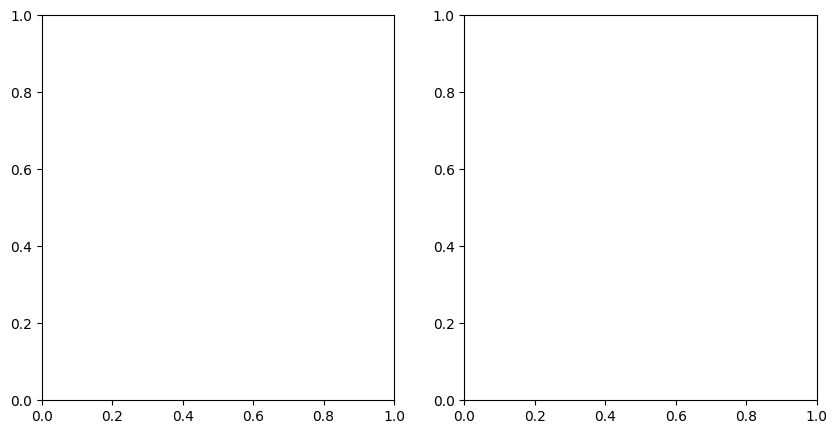

In [16]:

#common_events=common_events[5:20]
for i in range(0,13):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Prima subplot (x-z view)
    hit_class_colors = node_df_pi[node_df_pi.Ev == i].hit_class.map({0: 'blue', 1: 'green'})
    axs[0].scatter(node_df_pi[node_df_pi.Ev == i].zx_hit, node_df_pi[node_df_pi.Ev == i].x_hit, c=hit_class_colors, label='Event Data')
    axs[0].scatter(node_df_pi[node_df_pi.Ev == i].zx_hit, node_df_pi[node_df_pi.Ev == i].xMC, c='red', marker='+',label='MC')
    axs[0].set_title(f'Event {i}_x-z view')
    axs[0].set_ylim(-20, 20)
    axs[0].set_xlim(-100, 2000)
    axs[0].set_ylabel('x [mm] ')
    axs[0].set_xlabel('z [mm]')

    # Seconda subplot (y-z view)
    hit_class_colorsy = node_df_y_pi[node_df_y_pi.Ev == i].hit_class.map({0: 'blue', 1: 'green'})
    axs[1].scatter(node_df_y_pi[node_df_y_pi.Ev == i].zy_hit, node_df_y_pi[node_df_y_pi.Ev == i].y_hit, c=hit_class_colorsy, label='Event Data')
    axs[1].scatter(node_df_y_pi[node_df_y_pi.Ev == i].zy_hit, node_df_y_pi[node_df_y_pi.Ev == i].yMC, c='red',marker='+', label='MC')
    axs[1].set_title(f'Event {i}_y-z view')
    axs[1].set_ylim(-20, 20)
    axs[1].set_xlim(-100, 2000)
    axs[1].set_ylabel('y [mm]')
    axs[1].set_xlabel('z [mm]')

    # Creazione della legenda
    legend_labels = {'blue': 'Class 0', 'green': 'Class 1', 'red': 'Primary track'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[color], markerfacecolor=color, markersize=10) for color in ['blue', 'green']]
    legend_handles.append(plt.Line2D([0], [0], marker='+', color='red', linestyle='None', label=legend_labels['red'], markersize=10))

    axs[0].legend(handles=legend_handles, loc='upper right')
    axs[1].legend(handles=legend_handles, loc='upper right')

    plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/evt_display/Evt_display_evt_z{i}.png')
    plt.show()


In [23]:
node_df_pi[node_df_pi.Ev == 8]

,Ev,ly,view,x_hit,zx_hit,dx_hit,PE,PID,xMC
24,8,0,0,6.597,-30.466,0.84,32,-211.0,6.711
25,8,1,0,0.909,1164.320,0.21,9,-999.0,16.341


In [37]:
node_df_pi[node_df_pi.Ev==29]

,Ev,ly,view,x_hit,zx_hit,dx_hit,PE,PID,xMC
90,29,0,0,0.318,-30.521,0.07,33,-211.0,0.595
90,29,0,0,12.302,-30.521,2.29,7,-999.0,0.595
91,29,1,0,11.149,1164.463,1.19,24,-211.0,10.995
92,29,2,0,11.425,1202.107,1.9,16,-211.0,11.323


In [45]:
node_df_pi[node_df_pi.Ev == 200]

,Ev,ly,view,x_hit,zx_hit,dx_hit,PE,PID,xMC
673,200,0,0,-4.494,-30.575,0.42,62,-211.0,-4.355846
674,200,1,0,-8.926,1164.428,1.0,41,-211.0,-8.863084
675,200,2,0,-9.091,1201.820,1.45,16,-211.0,-9.004117
676,200,3,0,-11.366,1787.463,2.37,10,-211.0,-11.213009


In [64]:
node_df_pi[node_df_pi.Ev == 3050]

,Ev,ly,view,x_hit,zx_hit,dx_hit,PE,PID,xMC
11192,3050,0,0,-2.427,-30.575,0.31,32,-211.0,-2.338225
11193,3050,1,0,3.498,1164.428,0.48,28,-211.0,3.837422
11194,3050,2,0,3.742,1201.928,0.57,24,-211.0,4.031218
11195,3050,3,0,6.08,1787.428,0.68,41,-211.0,7.057018


In [61]:
node_df_y_pi[node_df_y_pi.Ev == 2100]

,Ev,ly,view,y_hit,zy_hit,dy_hit,PE,PID,yMC
7790,2100,0,1,-14.497,-29.750,2.47,8,-999.0,-3.515317
7790,2100,0,1,-8.07,-29.750,1.53,12,-999.0,-3.515317
7790,2100,0,1,-3.591,-29.750,0.49,24,-211.0,-3.515317
7791,2100,1,1,-10.106,1165.393,1.63,17,-211.0,-9.919345
7791,2100,1,1,-1.091,1165.393,0.2,14,-999.0,-9.919345
7791,2100,1,1,7.159,1165.393,1.32,13,-999.0,-9.919345
7792,2100,2,1,-10.245,1207.965,1.37,13,-211.0,-10.147462
7793,2100,3,1,-13.525,1788.393,1.96,19,-211.0,-13.257615


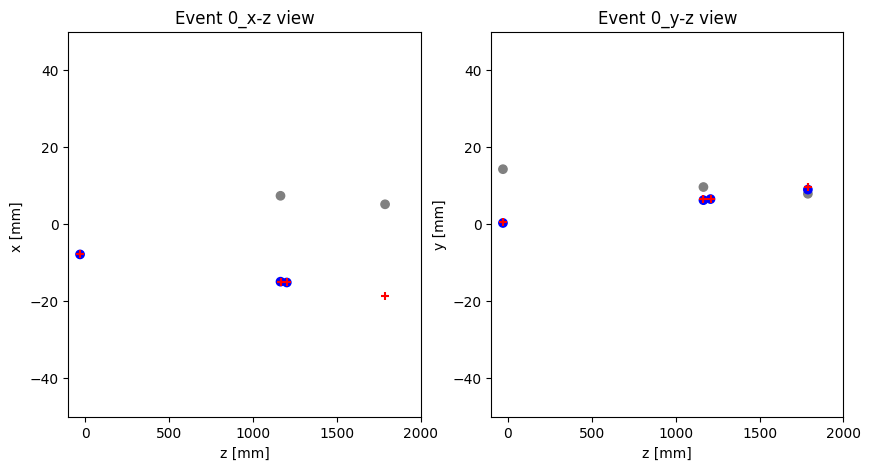

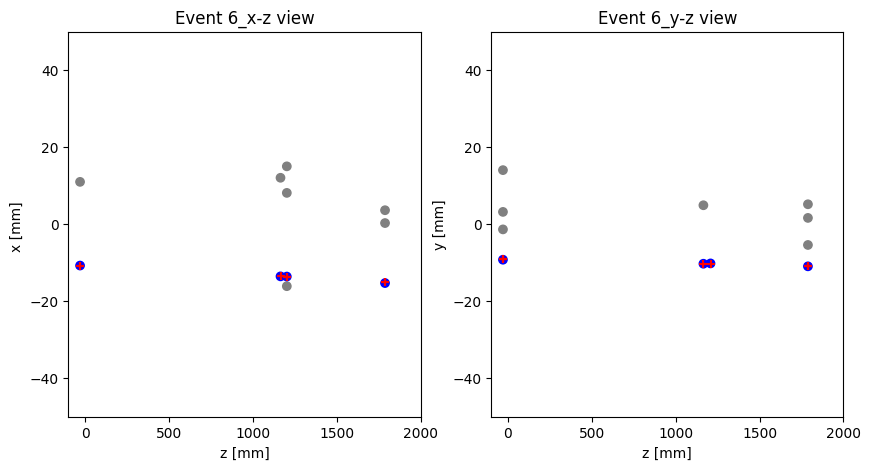

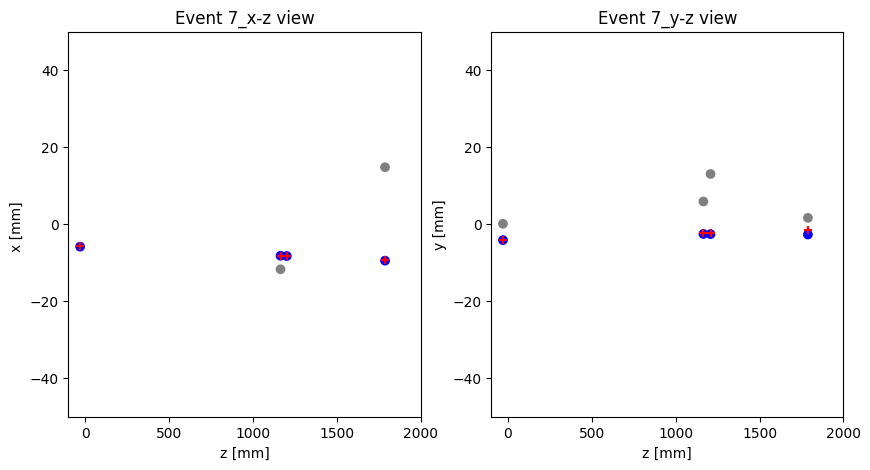

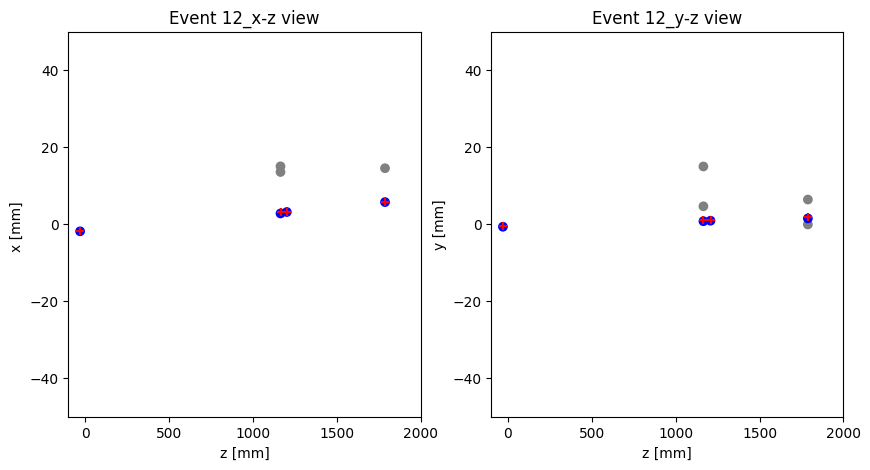

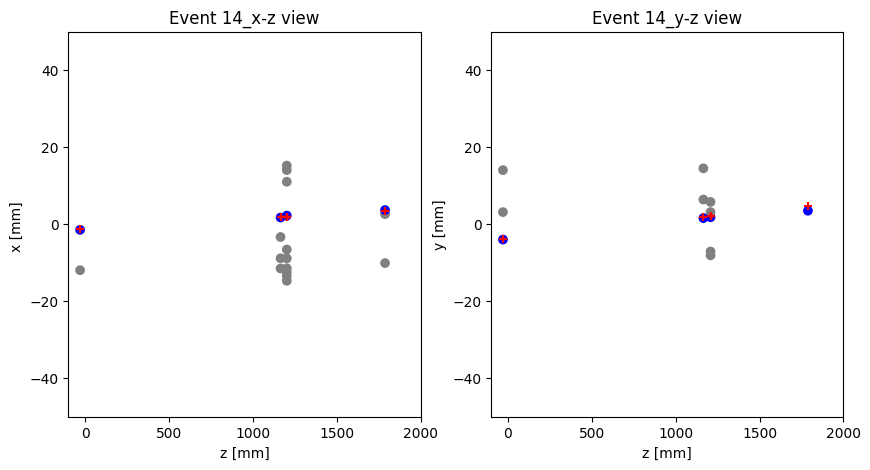

In [15]:
#common_events=common_events[5:20]
for ev in range(0,5):#len(list(common_events))):
    i=list(common_events)[ev]
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Prima subplot (x-z view)
    colors = ['gray' if PID == -999 else 'blue' for PID in node_df_pi[node_df_pi.Ev == i]['PID']]
    
    axs[0].scatter(node_df_pi[node_df_pi.Ev == i].zx_hit, node_df_pi[node_df_pi.Ev == i].x_hit, color=colors,label='Event Data')
    axs[0].scatter(node_df_pi[node_df_pi.Ev == i].zx_hit, node_df_pi[node_df_pi.Ev == i].xMC, c='red', marker='+',label='MC')
    axs[0].set_title(f'Event {i}_x-z view')
    axs[0].set_ylim(-50, 50)
    axs[0].set_xlim(-100, 2000)
    axs[0].set_ylabel('x [mm] ')
    axs[0].set_xlabel('z [mm]')

    # Seconda subplot (y-z view)
    colorsy = ['gray' if PID == -999 else 'blue' for PID in node_df_y_pi[node_df_y_pi.Ev == i]['PID']]
    axs[1].scatter(node_df_y_pi[node_df_y_pi.Ev == i].zy_hit, node_df_y_pi[node_df_y_pi.Ev == i].y_hit, color=colorsy,label='Event Data')
    axs[1].scatter(node_df_y_pi[node_df_y_pi.Ev == i].zy_hit, node_df_y_pi[node_df_y_pi.Ev == i].yMC, c='red',marker='+', label='MC')
    axs[1].set_title(f'Event {i}_y-z view')
    axs[1].set_ylim(-50, 50)
    axs[1].set_xlim(-100, 2000)
    axs[1].set_ylabel('y [mm]')
    axs[1].set_xlabel('z [mm]')

       # plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/evt_display/Evt_display_evt_z{i}.png')
    plt.show()


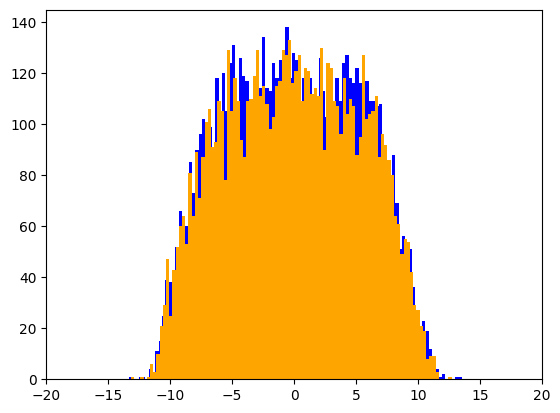

In [16]:
node=node_df_pi[node_df_pi.PID==-211]
nodey=node_df_y_pi[node_df_y_pi.PID==-211]
plt.hist(node[node.ly==0].x_hit,bins=100,color='blue',label='x impact poub')
plt.hist(nodey[nodey.ly==0].y_hit,bins=100,color='orange')

plt.xlim(-20,20)
plt.show()

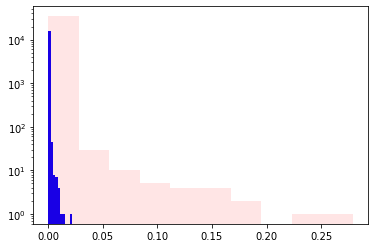

In [80]:
plt.hist(node_df_pi[node_df_pi.PID==-999].PE/len(node_df_pi),color='blue')
plt.hist(node_df_pi[node_df_pi.PID!=-999].PE/len(node_df_pi),color='red',alpha=0.1)
plt.yscale('log')
plt.show()

In [16]:
# import matplotlib.pyplot as plt
# common_events=common_events[:5]

# for i in common_events:
#     fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#     # Prima subplot (x-z view)
#     hit_class_colors = node_df_pi[node_df_pi.Ev == i].hit_class.map({0: 'blue', 1: 'green'})
#     axs[0].scatter(node_df_pi[node_df_pi.Ev == i].x_hit, node_df_pi[node_df_pi.Ev == i].zx_hit, c=hit_class_colors, label='Event Data')
#     axs[0].scatter(node_df_pi[node_df_pi.Ev == i].xMC, node_df_pi[node_df_pi.Ev == i].zx_hit, c='red', marker='+',label='MC')
#     axs[0].set_title(f'Event {i}_x-z view')
#     axs[0].set_xlim(-50, 50)
#     axs[0].set_ylabel('z [mm] ')
#     axs[0].set_xlabel('x [mm]')

#     # Seconda subplot (y-z view)
#     hit_class_colorsy = node_df_y_pi[node_df_y_pi.Ev == i].hit_class.map({0: 'blue', 1: 'green'})
#     axs[1].scatter(node_df_y_pi[node_df_y_pi.Ev == i].y_hit, node_df_y_pi[node_df_y_pi.Ev == i].zy_hit, c=hit_class_colorsy, label='Event Data')
#     axs[1].scatter(node_df_y_pi[node_df_y_pi.Ev == i].yMC, node_df_y_pi[node_df_y_pi.Ev == i].zy_hit, c='red',marker='+', label='MC')
#     axs[1].set_title(f'Event {i}_y-z view')
#     axs[1].set_xlim(-50, 50)
#     axs[1].set_ylabel('z [mm]')
#     axs[1].set_xlabel('y [mm]')

#     # Creazione della legenda
#     legend_labels = {'blue': 'Class 0', 'green': 'Class 1', 'red': 'Primary track'}
#     legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[color], markerfacecolor=color, markersize=10) for color in ['blue', 'green']]
#     legend_handles.append(plt.Line2D([0], [0], marker='+', color='red', linestyle='None', label=legend_labels['red'], markersize=10))

#     axs[0].legend(handles=legend_handles, loc='upper right')
#     axs[1].legend(handles=legend_handles, loc='upper right')

#     plt.show()


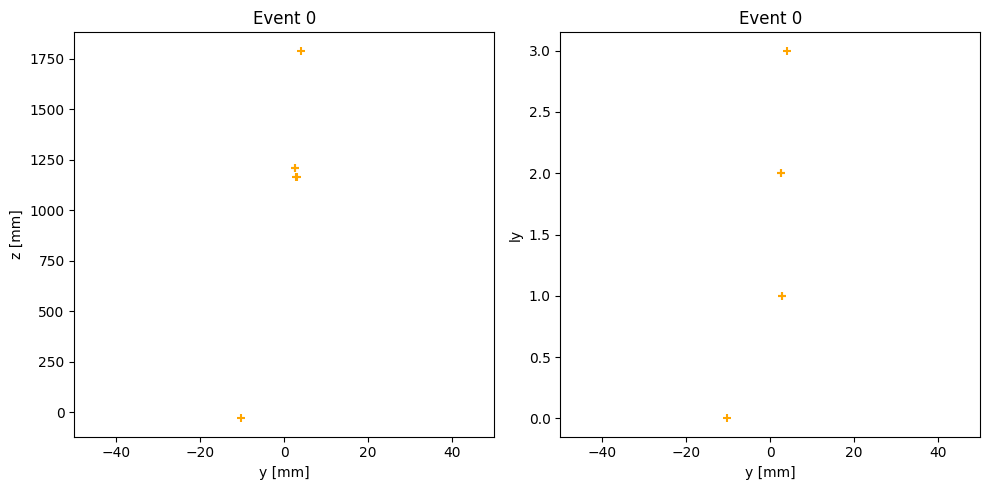

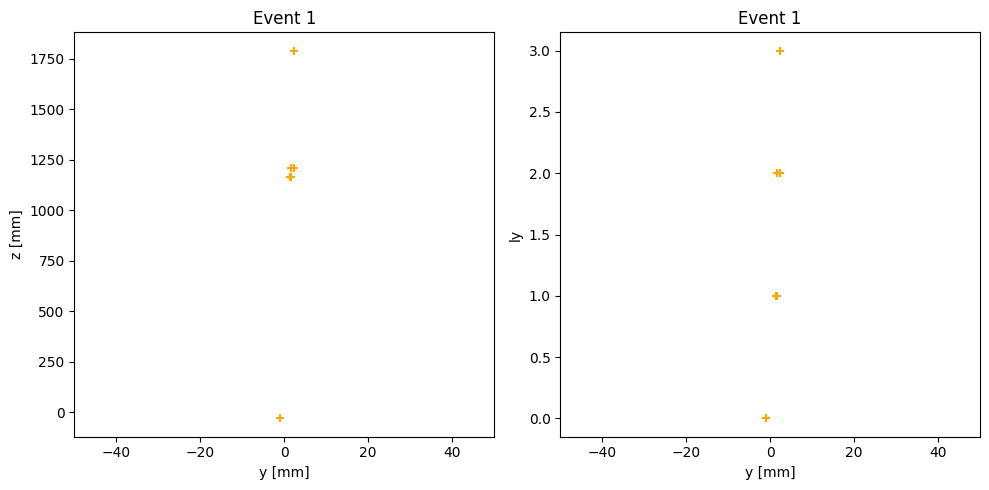

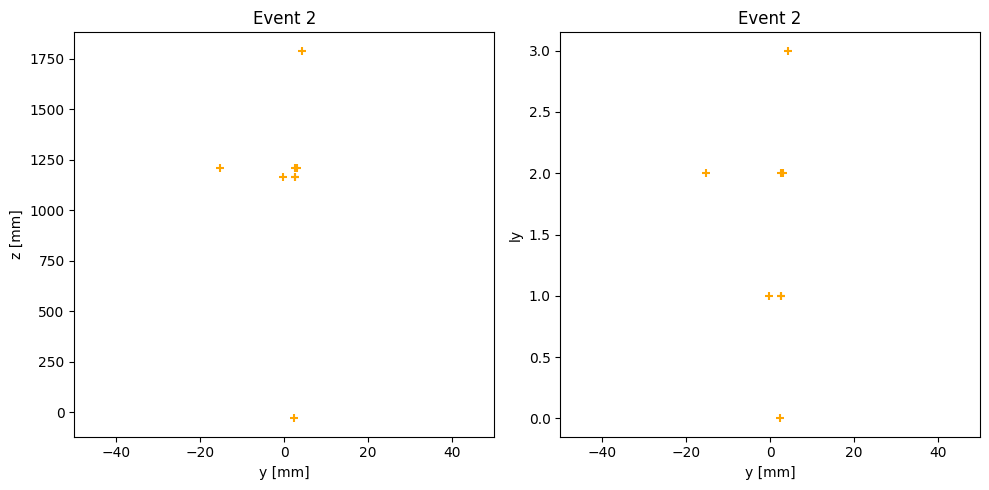

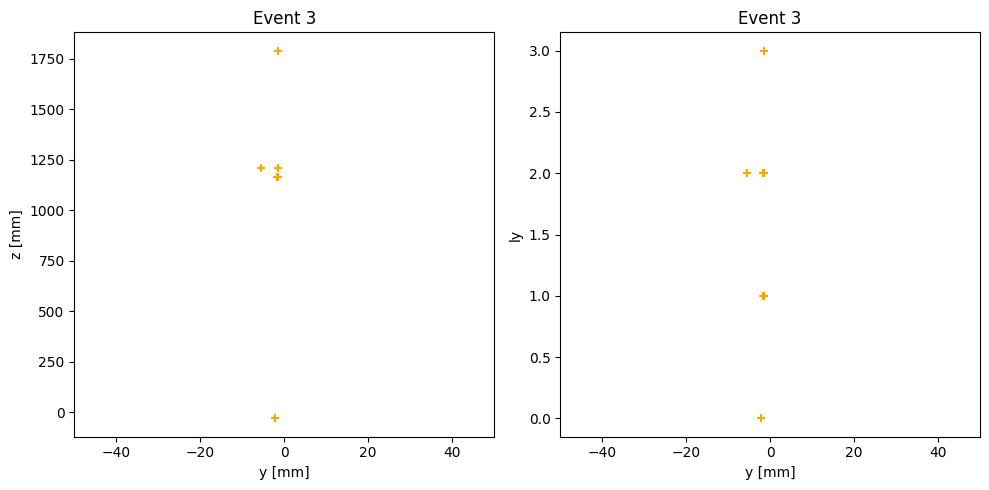

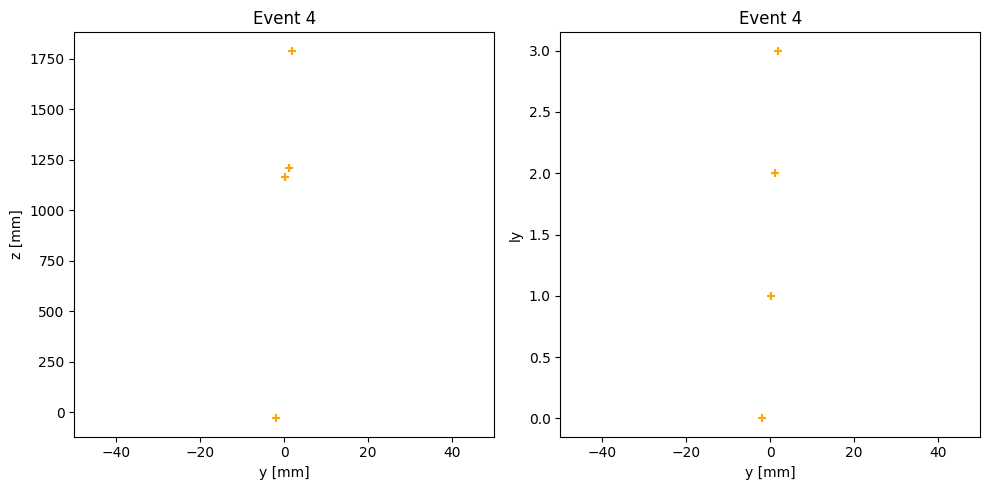

In [22]:
for ev in range(0,5):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].scatter(exp_df_y[exp_df_y.Ev == ev].y_hit, exp_df_y[exp_df_y.Ev == ev].zy_hit, c='orange', marker='+', label='exp_data')
    axs[0].set_title(f'Event {ev}')
    axs[0].set_xlim(-50, 50)
    axs[0].set_ylabel('z [mm]')
    axs[0].set_xlabel('y [mm]')

    # Secondo subplot: ly-x
    axs[1].scatter(exp_df_y[exp_df_y.Ev == ev].y_hit, exp_df_y[exp_df_y.Ev == ev].ly, c='orange', marker='+', label='exp_data')
    axs[1].set_title(f'Event {ev}')
    axs[1].set_xlim(-50, 50)
    axs[1].set_ylabel('ly')
    axs[1].set_xlabel('y [mm]')

    # Regola automatica la sovrapposizione dei subplot
    plt.tight_layout()

    # Mostra i subplot
    plt.show()    

In [23]:
ev_with_noise=node_df_pi[node_df_pi.PID==-999].Ev.unique()

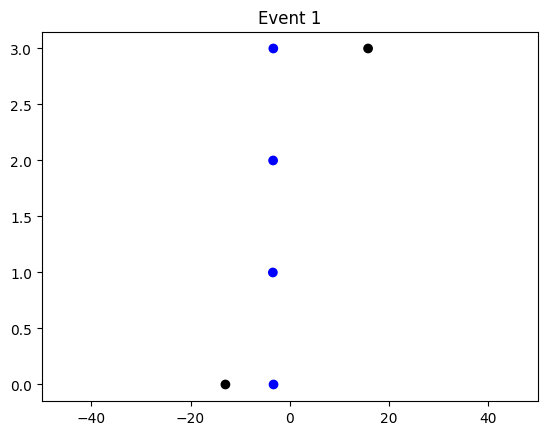

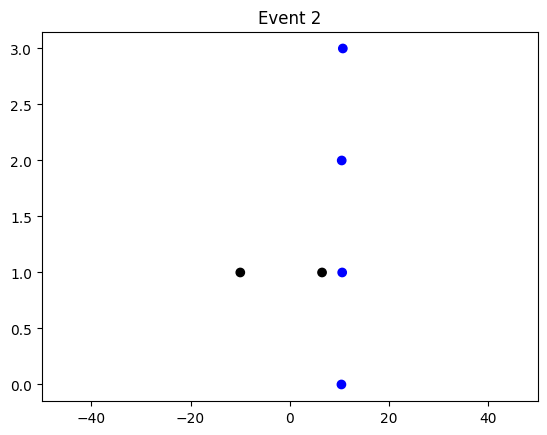

In [24]:
for i in range(0,2):#len(ev_with_noise)):
    hits_x=node_df_pi[node_df_pi.Ev==ev_with_noise[i]].x_hit
    hits_zx=node_df_pi[node_df_pi.Ev==ev_with_noise[i]].zx_hit    
    hits_ly=node_df_pi[node_df_pi.Ev==ev_with_noise[i]].ly
    hits_pid=node_df_pi[node_df_pi.Ev==ev_with_noise[i]].PID
    colors=[]
    for pid in hits_pid:
        if pid==-999:
            colors.append('black')
        elif pid == 2212:
            colors.append('red')
        else:
            colors.append('blue')
    #colors = ['black' if pid == -999 else 'blue' for pid in hits_pid]
    plt.title(f'Event {ev_with_noise[i]}')
    plt.scatter(hits_x,hits_ly,color=colors)
    plt.xlim(-50,50)
    plt.show()

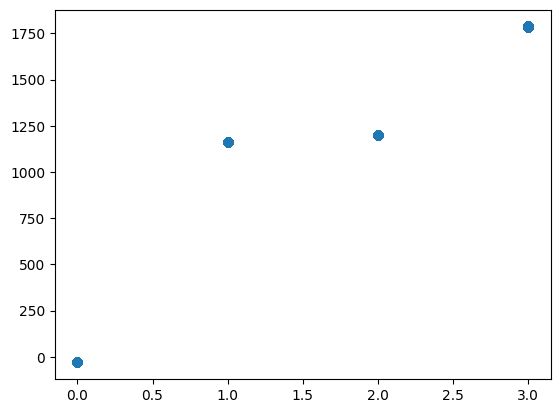

In [25]:
plt.scatter(node_df_pi.ly,node_df_pi.zx_hit)

Text(0, 0.5, 'Entries')

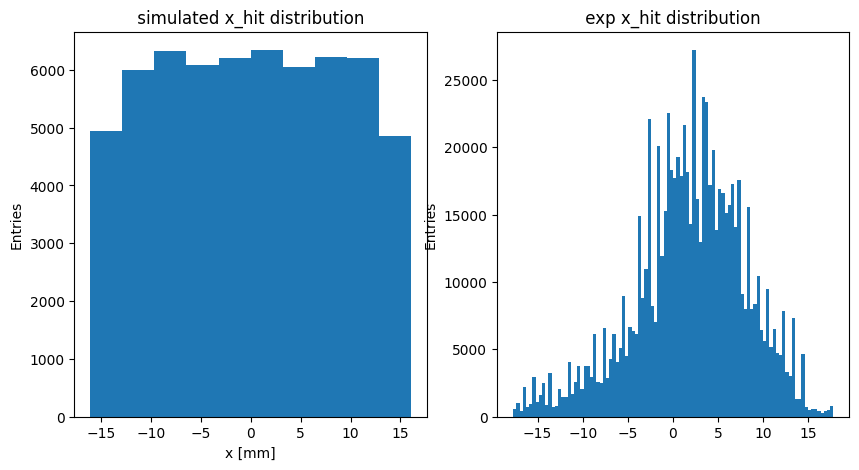

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(node_df_pi.x_hit)
axs[0].set_title(' simulated x_hit distribution ')
# axs[0].set_ylim(0, 30000)
axs[0].set_ylabel('Entries')
axs[0].set_xlabel('x [mm]')

axs[1].hist(exp_df.x_hit,bins=100)
axs[1].set_title(' exp x_hit distribution ')
# axs[1].set_ylim(0, 30000)
axs[1].set_ylabel('Entries')


Text(0.5, 0, 'y [mm]')

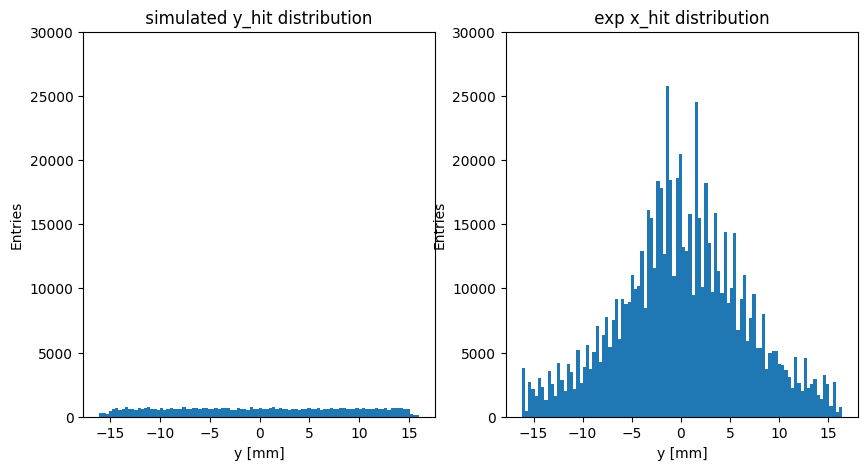

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(node_df_y_pi.y_hit,bins=100)
axs[0].set_title(' simulated y_hit distribution ')
axs[0].set_ylim(0, 30000)
axs[0].set_ylabel('Entries')
axs[0].set_xlabel('y [mm]')

axs[1].hist(exp_df_y.y_hit,bins=100)
axs[1].set_title(' exp x_hit distribution ')
axs[1].set_ylim(0, 30000)
axs[1].set_ylabel('Entries')
axs[1].set_xlabel('y [mm]')

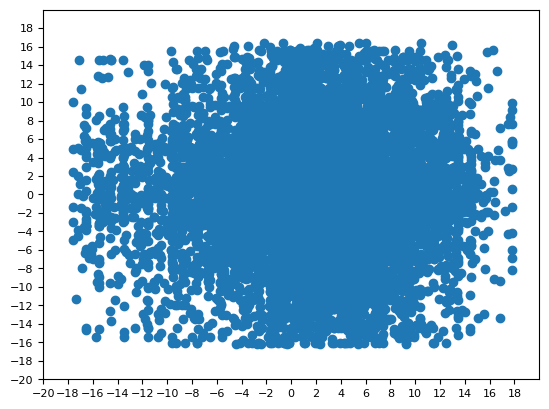

In [28]:
plt.scatter(exp_df[:10000].x_hit,exp_df_y[:10000].y_hit)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xticks(np.arange(-20,20, step=2.),fontsize=8)
plt.yticks(np.arange(-20,20, step=2.),fontsize=8)
plt.show()

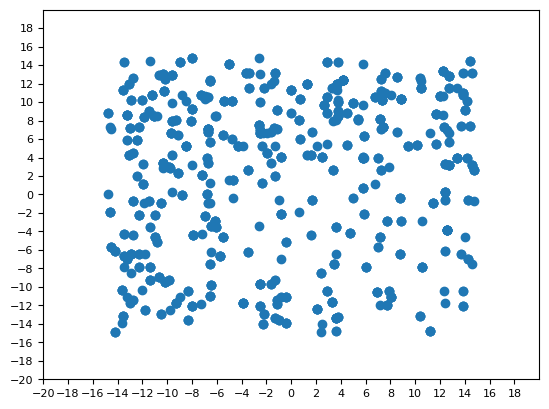

In [29]:
plt.scatter(node_df_pi.xMC[:1000],node_df_y_pi[:1000].yMC)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xticks(np.arange(-20,20, step=2.),fontsize=8)
plt.yticks(np.arange(-20,20, step=2.),fontsize=8)
plt.show()

In [5]:
#####hitclass 
node_df_pi1=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_1e-4/TrkData_viewx_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-400_pitch0.25node_df.parquet')
node_df_pi2=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_1e-4/TrkData_viewx_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-500_pitch0.25node_df.parquet')
node_df_pi3=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_1e-4/TrkData_viewx_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-550_pitch0.25node_df.parquet')
node_df_pi4=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_1e-4/TrkData_viewx_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-300_pitch0.25node_df.parquet')
# node_df_y_pi1=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-100_pitch0.25node_df.parquet')
# node_df_y_pi2=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-120_pitch0.25node_df.parquet')

<Axes: >

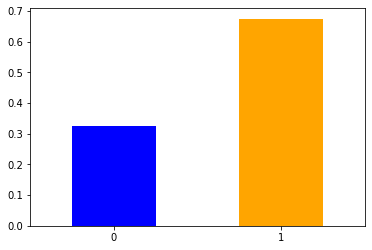

In [6]:
list_HS=[node_df_pi,node_df_pi1,node_df_pi2,node_df_pi3,node_df_pi4]
node_df_piHS=pd.concat(list_HS,ignore_index=True)
hit_count = node_df_piHS['hit_class'].value_counts().sort_index()
hit_count/=len(node_df_piHS)
hit_count.plot(kind='bar', rot=1, color=['blue', 'orange'])

In [42]:
hit_count

0    0.511916
1    0.488084
Name: hit_class, dtype: float64

In [ ]:
plt.hist(node_df_piHS[node_df_piHS.PID==-999].PE/len(node_df_piHS),color='blue')
plt.hist(node_df_piHS[node_df_piHS.PID!=-999].PE/len(node_df_piHS),color='red',alpha=0.1)
plt.yscale('log')
plt.show()

In [43]:
node_df_pi1y=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_2e-4/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-400_pitch0.25node_df.parquet')
node_df_pi2y=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_2e-4/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-500_pitch0.25node_df.parquet')
node_df_pi3y=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_2e-4/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-550_pitch0.25node_df.parquet')
node_df_pi4y=pd.read_parquet('../../Data/preprocessed/raw/pi-_10GeV_4ly_2e-4/TrkData_viewy_cl_TB_2023_T10_Sept_pi-Mono_10000_onAxis_10000-evt-300_pitch0.25node_df.parquet')


<Axes: >

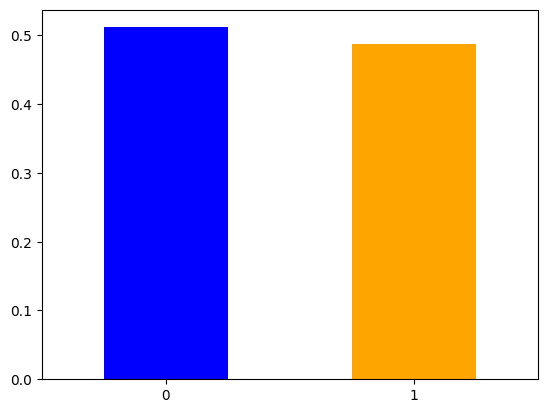

In [45]:
list_HSy=[node_df_pi1y,node_df_pi2y,node_df_pi3y,node_df_pi4y]
node_df_piHSy=pd.concat(list_HSy,ignore_index=True)
hit_count = node_df_piHS['hit_class'].value_counts().sort_index()
hit_count/=len(node_df_piHS)
hit_count.plot(kind='bar', rot=1, color=['blue', 'orange'])

In [62]:
import torch
from torch_geometric.data import Dataset, Data
data_n=node_df_pi
data_e=edge_df_pi
ev = data_n.Ev.unique()
data_list = []
for i in ev:
    node_feat = data_n[data_n.Ev == i][["x_hit", "dx_hit", "ly","zx_hit","PE"]]
    xi = node_feat.to_numpy()
    xi = torch.tensor(xi, dtype=torch.float32)
    edge_feat=data_e[data_e.Ev==i][["angx_row","deangx"]]
    edge_feat=edge_feat.to_numpy()
    edge_feat=torch.tensor(edge_feat,dtype=torch.float32)
    labels = data_n[data_n.Ev == i]["hit_class"]
    yi = labels.to_numpy()
    yi = torch.tensor(yi, dtype=torch.int)

    edge_indexi = data_e[data_e.Ev == i][['idx_node_s', 'idx_node_t']]
    edge_indexi = np.array(edge_indexi).transpose()
    edge_indexi = torch.tensor(edge_indexi, dtype=torch.int64)

    data_i = Data(x=xi, edge_index=edge_indexi, edge_attr=edge_feat,y=yi)
    data_list.append(data_i)


In [71]:
data_list[2]

Data(x=[4, 5], edge_index=[2, 1], edge_attr=[1, 2], y=[4])

In [70]:
edge_df_pi[edge_df_pi.Ev==2]

,idx_node_s,x_hit_s,zx_hit_s,dx_hit_s,xMC_s,ly_s,PE_s,PID_s,idx_node_t,x_hit_t,...,dx_hit_t,xMC_t,ly_t,PE_t,PID_t,Ev,angx_row,angx_MC,deangx,edge_class
9,0,10.424,-30.539,1.55,10.48,0,18,-211.0,1,10.577,...,1.57,10.48,1,18,-211.0,2,269.992664,270.0,-0.10578,1


In [68]:
node_df_pi[node_df_pi.Ev==2]

,Ev,ly,x_hit,zx_hit,dx_hit,PE,PID,xMC,hit_class,idx_node
8,2,0,10.424,-30.539,1.55,18,-211.0,10.48,1,0
9,2,1,10.577,1164.463,1.57,18,-211.0,10.48,1,1
10,2,2,10.481,1202.035,1.28,14,-211.0,10.48,1,2
11,2,3,10.708,1787.463,1.49,21,-211.0,10.48,1,3


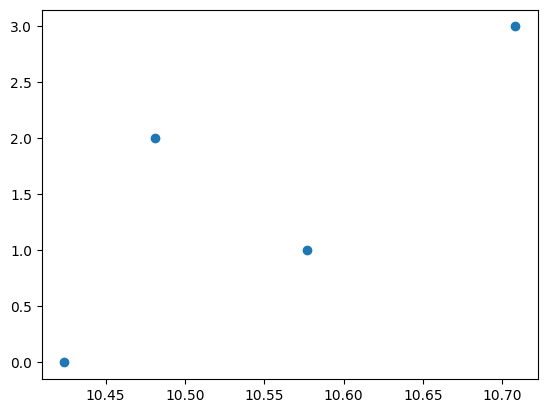

In [69]:
plt.scatter(node_df_pi[node_df_pi.Ev==2].x_hit,node_df_pi[node_df_pi.Ev==2].ly)